NOMBRE: Erick Sandoval



Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.

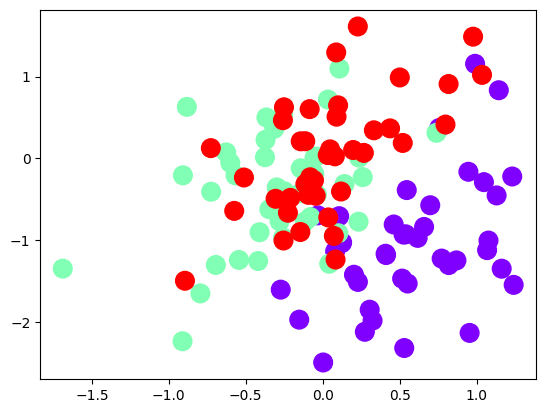

In [ ]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40 
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()

Ahora los datos están listos para su procesamiento posterior.

Primero preparamos el conjunto de datos.

In [ ]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [ ]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n


## K-Means 

1.	Reanalice su datos y obtenga 2 y 3 cluster.
2.	Concluya lo obtenido y grafique lo pedido en 1.

In [ ]:
#X12

In [ ]:
print(X12.shape)
print(y12.shape)

(80, 2)
(1, 80)


In [ ]:
y12 = y12.reshape(80,1)
print(y12.shape)

(80, 1)


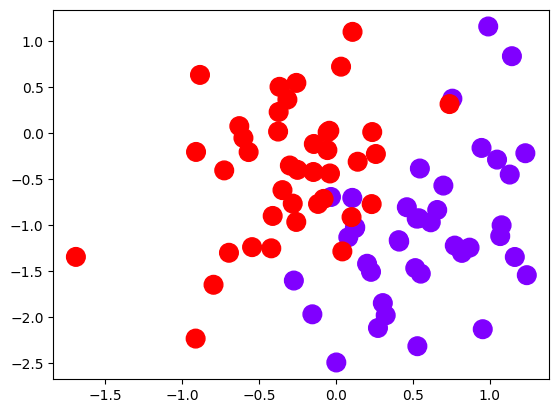

In [ ]:
color2=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

fig = plt.figure()
plt.scatter(X12[:,0], X12[:,1], s=180, c=color2, cmap=plt.cm.rainbow)
plt.show()

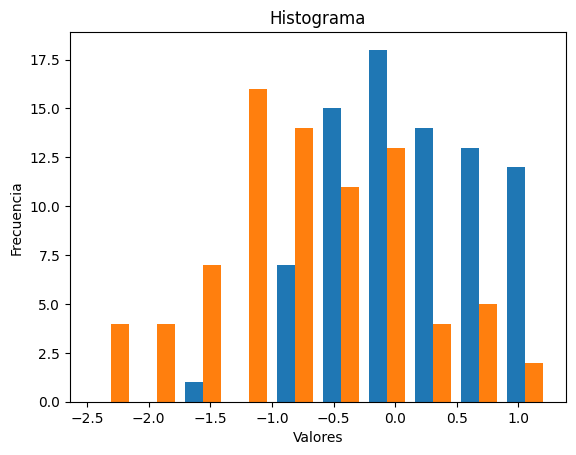

In [ ]:
plt.hist(X12, bins=10) 
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

plt.show()

# Modelando KMeans

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

#2 Clusters
modelData = X12

kmeans1 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=1234
)

kmeans1.fit(modelData)

KMeans(init='random', n_clusters=2, n_init=10, random_state=1234)

In [ ]:
#3 Clusters
modelData = X12

kmeans2 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=1234
)

kmeans2.fit(modelData)

KMeans(init='random', n_clusters=3, n_init=10, random_state=1234)

In [ ]:
clusterData1 = pd.DataFrame(modelData)
clusterData1['cluster'] = kmeans1.labels_

clusterData2 = pd.DataFrame(modelData)
clusterData2['cluster'] = kmeans2.labels_

In [ ]:
display(clusterData1.head()) #2 Clusters
display(clusterData2.head()) #3 Clusters

,0,1,cluster
0,0.658709,-0.837104,0
1,0.546014,-0.386755,1
2,1.231436,-0.220660,1
3,0.529736,-2.316402,0
4,0.990139,1.155912,1


,0,1,cluster
0,0.658709,-0.837104,0
1,0.546014,-0.386755,0
2,1.231436,-0.220660,0
3,0.529736,-2.316402,2
4,0.990139,1.155912,1


### Primer modelo con 2 Clusters

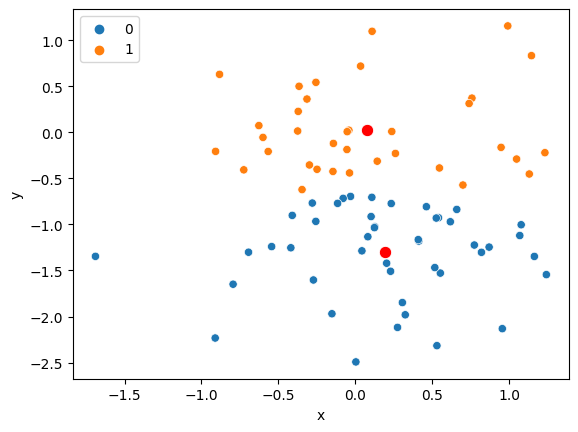

In [ ]:
centroids1 = kmeans1.cluster_centers_
centroidsData1 = pd.DataFrame(centroids1, columns=['x', 'y'])

sns.scatterplot(data=centroidsData1, x='x', y='y', color='red', marker='o', s=80)
sns.scatterplot(x=modelData[:,0], y=modelData[:,1], hue=kmeans1.labels_);

### Segundo modelo con 3 Clusters

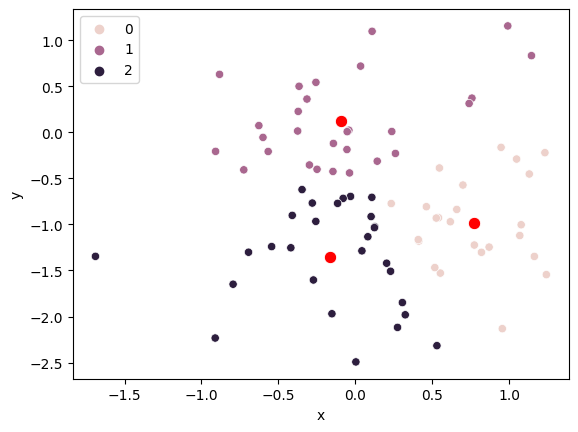

In [ ]:
centroids2 = kmeans2.cluster_centers_
centroidsData2 = pd.DataFrame(centroids2, columns=['x', 'y'])

sns.scatterplot(data=centroidsData2, x='x', y='y', color='red', marker='o', s=80)
sns.scatterplot(x=modelData[:,0], y=modelData[:,1], hue=kmeans2.labels_);

#Concluyendo

In [ ]:
print("El valor más bajo de SSE del primer Modelo: ",kmeans1.inertia_)
print("El valor más bajo de SSE del segundo Modelo: ",kmeans2.inertia_)

print("\nUbicaciones finales de los centroides del primer Modelo:\n", kmeans1.cluster_centers_)
print("\nUbicaciones finales de los centroides del segundo Modelo:\n", kmeans2.cluster_centers_)



El valor más bajo de SSE del primer Modelo:  45.72144774270305
El valor más bajo de SSE del segundo Modelo:  34.25677831193368

Ubicaciones finales de los centroides del primer Modelo:
 [[ 0.19299589 -1.3047852 ]
 [ 0.07554817  0.0237488 ]]

Ubicaciones finales de los centroides del segundo Modelo:
 [[ 0.770345   -0.98307122]
 [-0.09318852  0.12633563]
 [-0.16250001 -1.35099337]]


En conclusion, se observa que al ser agrupados en 2 clusters, los datos se clasifican segun su valor en el eje Y, donde un grupo contendra los valores principalmente negativos y el otro grupo los valores positivos.

Por otra parte, al ser agrupados en 3 clusters, los datos se agrupan deacuerdo a sus valores tanto en el eje Y como en el eje X. Donde se observa una tendencia similar con los clusters 1 y 2 en que incluyen algunos valores tanto negativos como positivos en el eje X, pero en cambio, en el cluster 0, este se compone por principalmente valores positivos en el eje X.

De acuerdo a las metricas de SSE o la suma de los errores cuadrados de ambos modelos, el que obtuvo un menor SSE fue el segundo modelo, indicando que sus datos se agrupan de forma mas cercana a su correspondiente centroide de cada cluster.